# flats-in-cracow exploratory data analysis

## Imports

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from pylab import rcParams

## Setup

In [11]:
rcParams['figure.figsize'] = (4, 4)

In [12]:
pd.options.display.float_format = "{:,.2f}".format

## Data loading

In [13]:
path = '../flats-data/00_data.csv'

In [14]:
data = pd.read_csv(path, lineterminator='\n')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   District   2807 non-null   object
 1   Amount     2807 non-null   int64 
 2   Seller     2807 non-null   object
 3   Area       2807 non-null   int64 
 4   Rooms      2807 non-null   int64 
 5   Bathrooms  2807 non-null   int64 
 6   Parking    2807 non-null   object
 7   Garden     2807 non-null   bool  
 8   Balcony    2807 non-null   bool  
 9   Terrace    2807 non-null   bool  
 10  Lift       2807 non-null   bool  
 11  New        2807 non-null   bool  
 12  Estate     2807 non-null   bool  
 13  Townhouse  2807 non-null   bool  
 14  Apartment  2807 non-null   bool  
 15  Land       2807 non-null   bool  
 16  Studio     2807 non-null   bool  
dtypes: bool(10), int64(4), object(3)
memory usage: 181.0+ KB


In [16]:
data.head()

,District,Amount,Seller,Area,Rooms,Bathrooms,Parking,Garden,Balcony,Terrace,Lift,New,Estate,Townhouse,Apartment,Land,Studio
0,dębniki,990000,realtor,93,4,2,street,False,False,False,False,False,False,False,False,False,False
1,prądnik biały,401430,realtor,41,2,1,none,False,True,True,True,True,False,False,False,False,False
2,krowodrza,520000,realtor,55,3,1,street,False,False,False,False,False,False,False,False,False,False
3,bieżanów,287387,realtor,38,2,1,garage,False,True,False,False,False,False,False,False,False,False
4,mistrzejowice,532928,realtor,61,2,1,none,False,False,False,False,True,True,False,False,False,False


## Numeric features

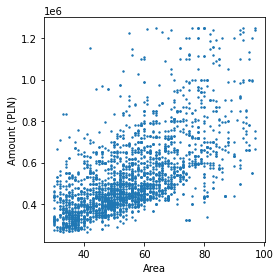

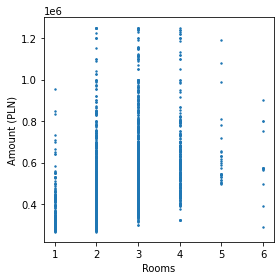

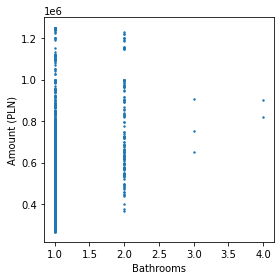

In [19]:
numeric = list(data.select_dtypes('number').columns)    
for col in numeric:
    if col != 'Amount':
        plt.scatter(data[col], data['Amount'], s=2)
        plt.xlabel(f'{col}')
        plt.ylabel(f'Amount (PLN)')
        plt.tight_layout()
        plt.show()

In [24]:
data.select_dtypes('number').corr()

,Amount,Area,Rooms,Bathrooms
Amount,1.00,0.64,0.33,0.29
Area,0.64,1.00,0.70,0.30
Rooms,0.33,0.70,1.00,0.23
Bathrooms,0.29,0.30,0.23,1.00


## Binary features

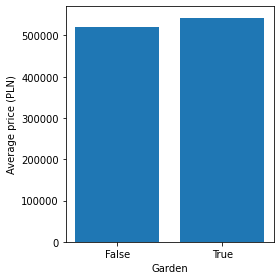

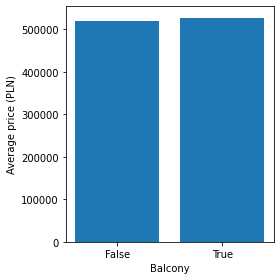

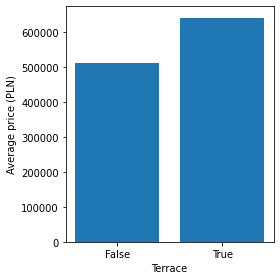

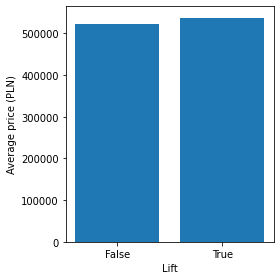

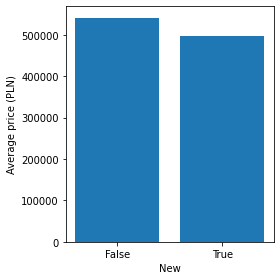

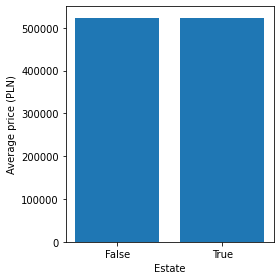

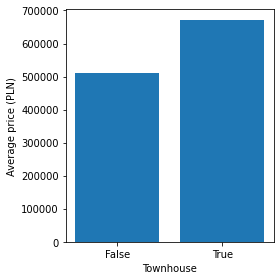

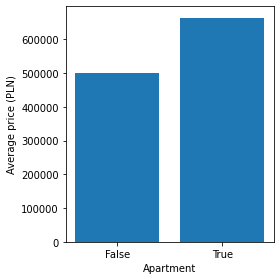

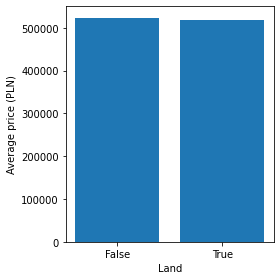

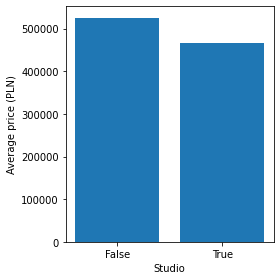

In [21]:
binary = list(data.select_dtypes(bool).columns)    
for col in binary:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)
    plt.bar(group[col], height=group['Amount'])
    plt.xticks(ticks=group[col].to_list(),
               labels=group[col].to_list())
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()

## Categorical features

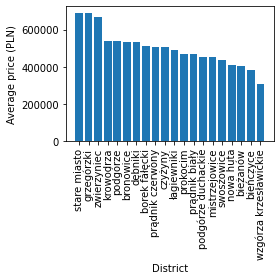

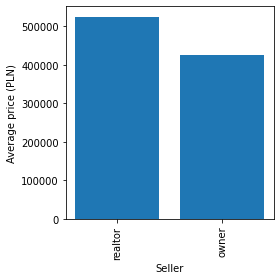

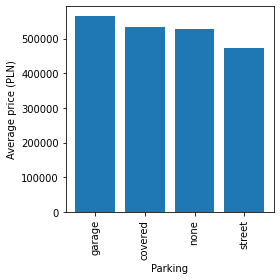

In [22]:
categorical = list(data.select_dtypes('object').columns)    
for col in categorical:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)

    plt.bar(group[col], group['Amount'])
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()    